In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/")

from typhon.plots import worldmap
import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets using typhon FileSet objects.

In [2]:
bahamas = xr.open_dataset('/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/data/bahamas_20200211_v0.4.nc')
dropsondes = xr.open_dataset('/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/data/dropsondes_20200211_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [3]:
takeoff = 0
touchdown = len(bahamas['time']) - 1

#circle set
###############
enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes,  0)
exit_c1  = fpt.ds_timestamp_ind(bahamas, dropsondes, 10)
enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
exit_c2  = fpt.ds_timestamp_ind(bahamas, dropsondes, 22)
enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
exit_c3  = fpt.ds_timestamp_ind(bahamas, dropsondes, 34)
enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
exit_c4  = fpt.ds_timestamp_ind(bahamas, dropsondes, 46)
enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 47)
exit_c5  = fpt.ds_timestamp_ind(bahamas, dropsondes, 58)


#leg1 (towards NTAS)
min_roll_before_leg1 = fpt.min_timestamp_ind(bahamas, 'roll', 
                       slice('2020-02-11T18:45:00', '2020-02-11T19:00:00'), order=1000)

enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_leg1, 0., 0.05)

max_roll_after_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-02-11T19:45:00', '2020-02-11T20:00:00'), order=1000)

exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg1, 0., 0.01)

#radar_circle
max_roll_before_radar_circle = fpt.max_timestamp_ind(bahamas, 'roll', 
                               slice('2020-02-11T19:30:00', '2020-02-11T20:00:00'), order=1000)

enter_radar_circle = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_radar_circle, 10., 0.05)

max_roll_after_radar_circle = fpt.max_timestamp_ind(bahamas, 'roll', 
                              slice('2020-02-11T19:50:00', '2020-02-11T20:10:00'), order=10000)

exit_radar_circle = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_radar_circle, 10., 0.1)


#leg2 (return NTAS)
max_roll_before_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                       slice('2020-02-11T20:05:00', '2020-02-11T20:30:00'), order=1000)

enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_leg2, 0., 0.05)

max_roll_after_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-02-11T20:45:00', '2020-02-11T21:00:00'), order=1000)

exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg2, 0., 0.05)  

#lidar_cal
bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))

min_roll_before_lidar_cal = fpt.min_timestamp_ind(bahamas, 'roll', 
                            slice('2020-02-11T21:00:00', '2020-02-11T21:15:00'), order=1000)

enter_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_lidar_cal, 0., 0.05)

min_dzdt_after_lidar_cal = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                           slice('2020-02-11T21:15:00', '2020-02-11T21:30:00'), order=1000) 

exit_lidar_cal = fpt.find_first_value_before_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_lidar_cal, 0., 0.05)



ts_ind_list = [takeoff, enter_c1, exit_c1, 
               enter_c2, exit_c2, 
               enter_c3, exit_c3, 
               enter_c4, exit_c4, 
               enter_c5, exit_c5,
               enter_leg1, exit_leg1,
               enter_radar_circle, exit_radar_circle,
               enter_leg2, exit_leg2,
               enter_lidar_cal, exit_lidar_cal, 
               touchdown]
label_list = ["takeoff", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", 
              "enter_c3", "exit_c3",
              "enter_c4", "exit_c4", 
              "enter_c5", "exit_c5", 
              "enter_leg1", "exit_leg1", 
              "enter_radar_circle", "exit_radar_circle", 
              "enter_leg2", "exit_leg2",
              "enter_lidar_cal", "exit_lidar_cal", 
              "touchdown"]

In [3]:
#create markers for every dropsonde
#--> helps to see the individual circles
#only execute if needed!
ts_ind_list = []
label_list = np.arange(1,len(dropsondes["launch_time"])+1)
for i in range(len(dropsondes["launch_time"])):
    ts_ind_list.append(fpt.ds_timestamp_ind(bahamas, dropsondes,  i))

# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

/Users/Max/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


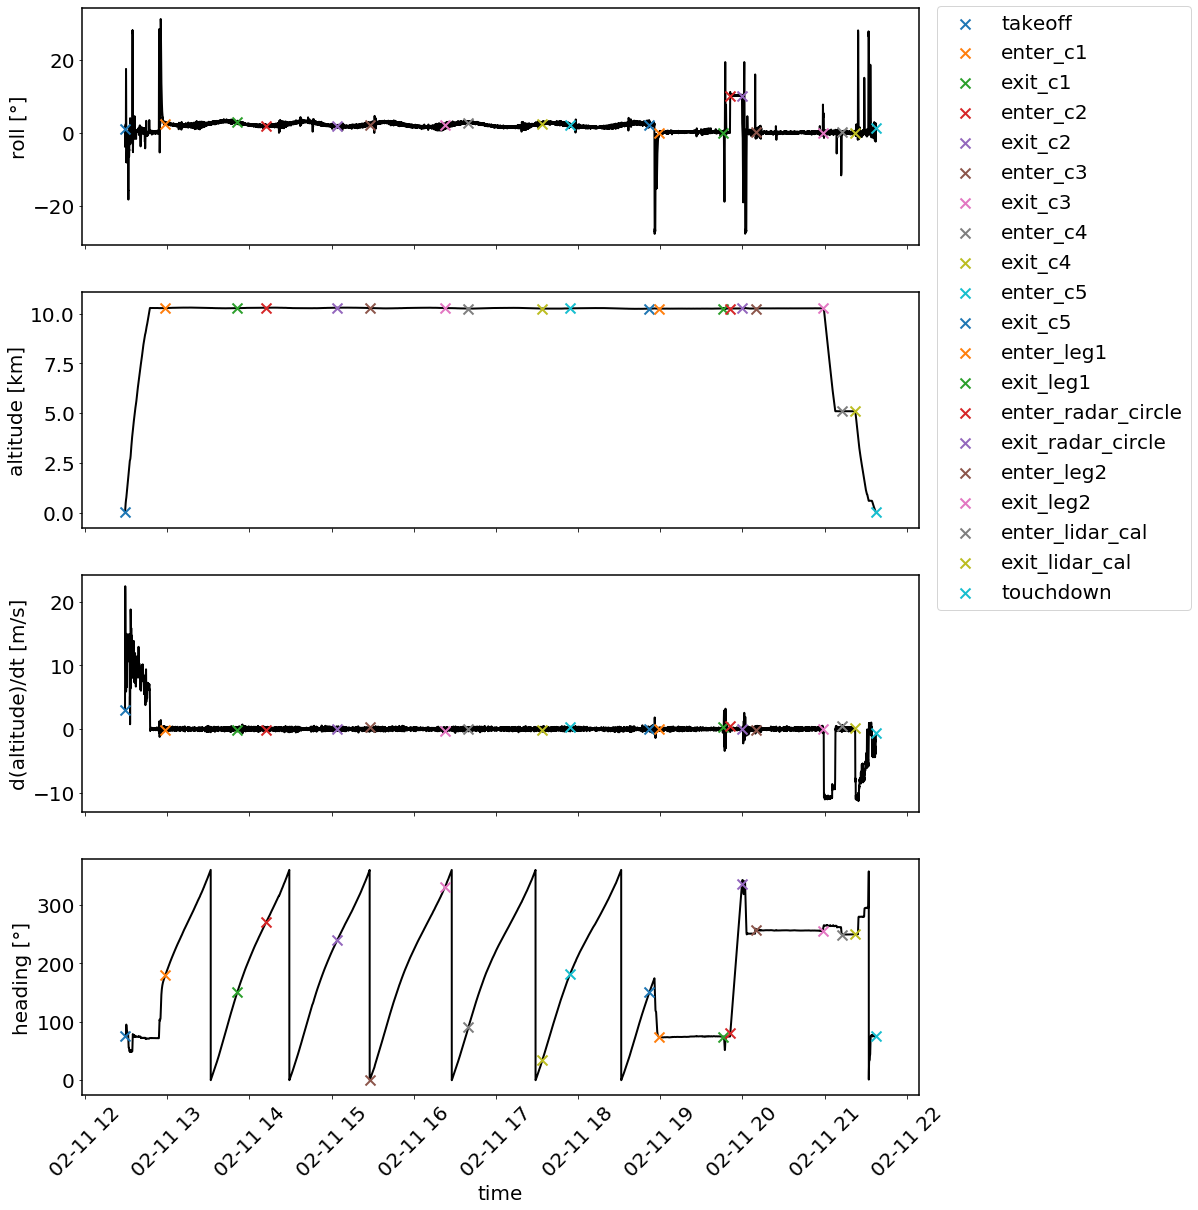

In [4]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Create a ResearchFlight object to represent the flight meta data.

In [5]:
RF12 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0211',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['dataset creator'],
                          },
                          {
                              'name': 'Marek Jacob',
                              'email': 'marek.jacob@uni-koeln.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200211/HALO-0211.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Standard circle pattern with 5 complete circles.',
                               'GPM-satellite overpass on the way back from NTAS (20:27 UTC).',
                               'Radar-calibration maneuver around NTAS (20-deg-wiggles and 10-deg-circle).',
                               'An additional sonde was launched near NTAS after the calibration maneuver.',
                               'Western circle area was dominated by convection with strong precipitation signals '
                               'and stratocumulus on top.',
                               'Rest of circle mostly occupied by small sugar cumuli.',
                               'The excursion legs were characterized by larger flower-like cloud clusters '
                               'growing on a sugar cloud field.'],
)

# Store the flight phase information in ResearchFlightSegment objects.

In [6]:
circle1 = ResearchFlightSegment(kind='circle',
                                name='c1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values)
                               )
circleBreak1to2 = ResearchFlightSegment(kind='circle_break',
                                        name='cb1to2',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values)
                                       )
circle2 = ResearchFlightSegment(kind='circle',
                                name='c2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values)
                               )
circleBreak2to3 = ResearchFlightSegment(kind='circle_break',
                                        name='cb2to3',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values)
                                       ) 
circle3 = ResearchFlightSegment(kind='circle',
                                name='c3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values)
                               )
circleBreak3to4 = ResearchFlightSegment(kind='circle_break',
                                        name='cb3to4',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c3].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c4].values)
                                       ) 
circle4 = ResearchFlightSegment(kind='circle',
                                name='c4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values)
                               )
circleBreak4to5 = ResearchFlightSegment(kind='circle_break',
                                        name='cb4to5',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values)
                                       )
circle5 = ResearchFlightSegment(kind='circle',
                                name='c5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values)
                               )
leg1 = ResearchFlightSegment(kind='straight_leg',
                             name='leg1_outbound_NTAS',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values)
                            )
radar_cal_wiggle1 = ResearchFlightSegment(kind='radar_calibration_wiggle',
                                         name='radar_cal_wiggle1',
                                         start=fpt.dt64_to_dt(bahamas["time"][exit_leg1].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][enter_radar_circle].values)
                                        )
radar_cal_tilted = ResearchFlightSegment(kind='radar_calibration_tilted', 
                                         name='radar_cal_tilted',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_radar_circle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_radar_circle].values)
                                        )
radar_cal_wiggle2 = ResearchFlightSegment(kind='radar_calibration_wiggle',
                                         name='radar_cal_wiggle2',
                                         start=fpt.dt64_to_dt(bahamas["time"][exit_radar_circle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][enter_leg2].values)
                                        )
leg2 = ResearchFlightSegment(kind='straight_leg',
                             name='leg2_inbound_NTAS',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values)
                            )
lidar_cal = ResearchFlightSegment(kind='lidar_calibration',
                                  name='lidar_cal',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values)
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [7]:
RF12.to_dictionary()

{'name': 'RF12',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0211',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['dataset creator']},
  {'name': 'Marek Jacob',
   'email': 'marek.jacob@uni-koeln.de',
   'tags': ['flight PI']}],
 'date': datetime.date(2020, 2, 11),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200211/HALO-0211.pdf',
 'takeoff': datetime.datetime(2020, 2, 11, 12, 29, 5),
 'landing': datetime.datetime(2020, 2, 11, 21, 37, 29),
 'events': [],
 'remarks': ['Standard circle pattern with 5 complete circles.',
  'GPM-satellite overpass on the way back from NTAS (20:27 UTC).',
  'Radar-calibration maneuver around NTAS (20-deg-wiggles and 10-deg-circle).',
  'An additional sonde was launched near NTAS after the calibration maneuver.',
  'Western circle area was dominated by convection with strong precipitation signals and stratocumulus on top.',
  'Rest of circle mostly occupied by small sugar

In [8]:
RF12.append_segments([circle1, circleBreak1to2, 
                      circle2, circleBreak2to3,
                      circle3, circleBreak3to4,
                      circle4, circleBreak4to5,
                      circle5,  
                      leg1, radar_cal_wiggle1, radar_cal_tilted, 
                      radar_cal_wiggle2, leg2, lidar_cal])

In [9]:
RF12.to_yaml(filename='/Users/Max/Documents/Studium/HiWi/HiWi_Fernerkundung/FlightPhases/halo-flight-phase-separation-1/flight_phase_files/HALO_RF12_20200211_info.yaml')